## Texi Guru Challange: Fare Prediction (Regression Problem)

In [122]:
# import essential pkgs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing section 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Pipeline section
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

# Features selection section
from sklearn.decomposition import PCA 
from sklearn.feature_selection import RFE 

# Params Grid search and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# models
from sklearn.base import BaseEstimator # for function argument
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.svm import SVR 

# ensemble learning methods
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# test and scoring mechanisum

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


### Reading the test and train data and trying to visualize the relation between the datapoints

In [123]:
try: # For kaggle
  train_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

  test_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
  print('running on kaggle')
except: #for local machine 
  print('running on local machine')
  train_pd = pd.read_csv('train.csv')
  test_pd = pd.read_csv('test.csv')
  pass
copy_train_pd = train_pd.copy()
copy_test_pd = test_pd.copy()


running on local machine


### Exploratory Data Analysis section
* plotting of features between the points
* plot the corelation matrix between the features
* Draw the insights using the plotting and features transformation

In [124]:
train_pd.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [125]:
print('Null values in the given training data set is:')
train_pd.isna().sum()

Null values in the given training data set is:


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [126]:
print(f'''
unique values of passanger_count is: {train_pd['passenger_count'].unique()}\n
unique values of RateCodeId is: {train_pd['RatecodeID'].unique()}\n
unique values of store_and_fwd_flag is: {train_pd['store_and_fwd_flag'].unique()}\n
unique values of congestion_surcharge is: {train_pd['congestion_surcharge'].unique()}\n
unqiue values of airport_fees is: {train_pd['Airport_fee'].unique()}\n
''')



unique values of passanger_count is: [ 1.  3.  0.  2. nan  4.  6.  5.  8.  9.]

unique values of RateCodeId is: [ 1. 99.  3. nan  2.  5.  4.]

unique values of store_and_fwd_flag is: ['N' nan 'Y']

unique values of congestion_surcharge is: [ 2.5  0.   nan -2.5]

unqiue values of airport_fees is: [ 0.    1.75   nan -1.75]




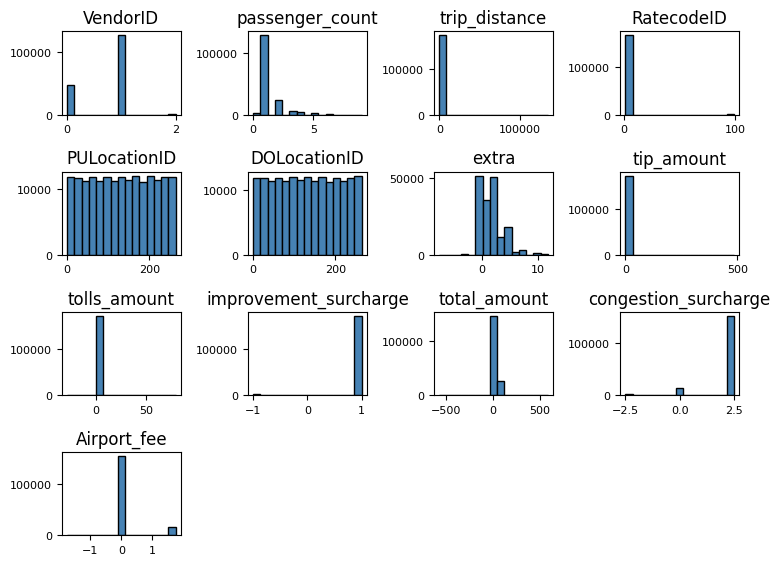

In [127]:
train_pd.hist(bins= 15, color='steelblue', edgecolor='black', linewidth= 1.0,
              xlabelsize= 8, ylabelsize= 8, grid= False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

In [128]:
# sns.pairplot(X) ## Do not run this cell again
#* please prefer pairplot.png for details

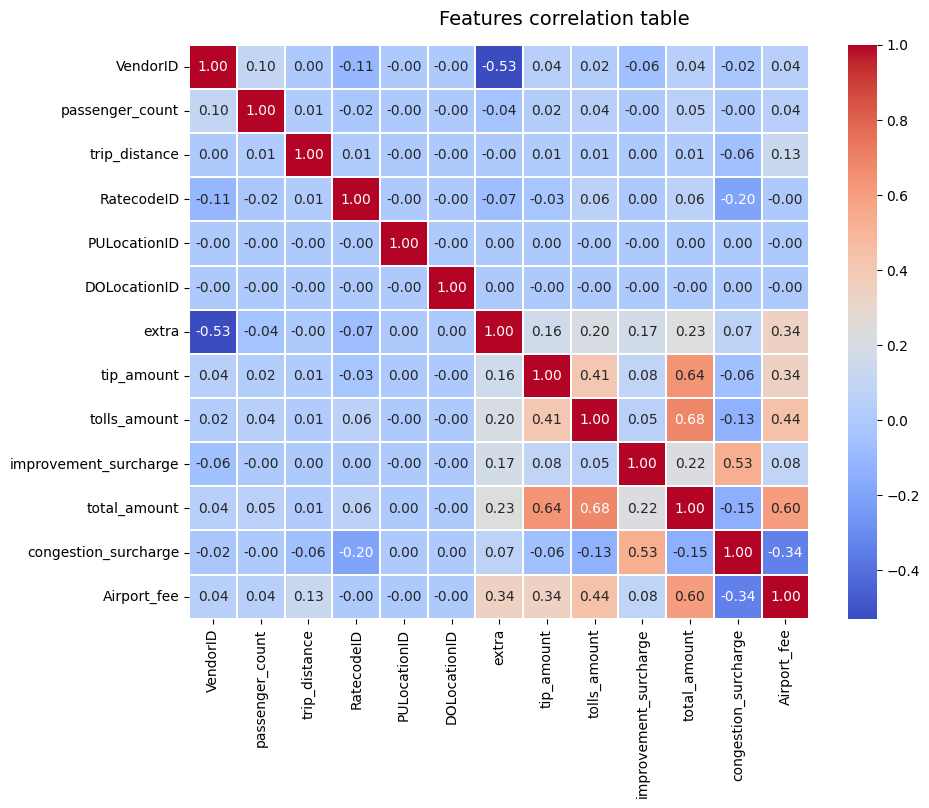

In [129]:
f, ax = plt.subplots(figsize=(10, 7))
corr = train_pd.corr(numeric_only=True)
heat_map = sns.heatmap(round(corr, 2), annot= True, ax= ax, cmap= 'coolwarm', 
                       fmt= '.2f', linewidths= 0.05)
f.subplots_adjust(top= 0.93)
plot = f.suptitle('Features correlation table', fontsize= 14)

### Summary of EDA
* Features have some extreme outliers that is: - 
* - Mean **Trip_distance** is : 5 units but the maximum values is: **135182**
* - Similarly, **Tip Amount** mean values is: ~4.9 but maximum values is **484**
### Based on the correlatioin matrix
* There is absolute to minor correlation between tip_distance, toll_amount, airport_fees, improvement_surcharge ant tip_amount.
* But, as seen from the correlation chart the correlation between the features is not that much strong. <br> **Which can be concluded that features are not tightly correlated with each other**

### Based on the observation {These facts need to be confirmed from industrial expert}
* Few data points have the less than 1 passanger data count
* At some datapoints **Extra** feature taking less than zero value.
* At some points airport fees is taken as -1.75 which need to check thorughly.

---

### Writing essential functions for model training and preprocessing

* **convert_dt_obj_to_datetime(df, col_name):** - This function take the Dataframe by reference and col name, split the date time column into , year, month, day, hour column. after spliting it add the following column into same Dataframe.

* **Convert_dt_str_to_datetime(df, col_name)** : it convert datetime string into datetime python column.

* **revert_date_time_if_reversed(df, col1, col2)** : It revert the values if condition matches.

In [130]:
def convert_dt_str_to_datetime(df:pd.DataFrame, col_name:str):
    df[col_name] = pd.to_datetime(df[col_name])


def convert_dt_obj_to_datetime(df:pd.DataFrame, col_name:str):
    # df[col_name] = pd.to_datetime(df[col_name])
    df[col_name +'_Year'] = df[col_name].apply(lambda time: time.year)
    df[col_name +'_Month'] = df[col_name].apply(lambda time: time.month)
    df[col_name +'_Day'] = df[col_name].apply(lambda time: time.day)
    df[col_name +'_Hour'] = df[col_name].apply(lambda time: time.hour)
#     df[col_name +'_Minute'] = df[col_name].apply(lambda time: time.minute) # IGNORING MINS

def revert_date_time_if_reversed(df:pd.DataFrame, col1:str, col2:str):
    idx = (df[col2] < df[col1])
    df.loc[idx, [col1, col2]] = df.loc[idx, [col2, col1]]


#### Utility function for model traininng, Hyper Parameter Tunning, finding best parameter given a list of estimators

In [131]:
def train_model(model:Pipeline, X:pd.DataFrame,
                 y:pd.DataFrame, name:str):
    '''
    This function will train the model with given estimator 
    parameters
    ---------
    model: any model which need to be trained
    train_pd: training dataset
    y_train: labels/values 
    name: name of the estimator
    ----
    '''
    print(f'training the given model {name}')
    model.fit(X, y)
    print(f'Model {name} training complete')

def print_train_test_score( y_train:pd.DataFrame, y_hat:pd.DataFrame,
                            y_test:pd.DataFrame, y_test_hat, name:str,
                            score_function = r2_score):
    '''
    This function will print the score on given function
    '''
    train_score = score_function(y_train, y_hat)
    train_std = y_hat.std()
    test_score = score_function(y_test, y_test_hat)
    test_std = y_test_hat.std()
    print(f'Training score of {name} is:',
          f'Score: {train_score:.3f} +/- Standard Dev: {train_std:.3f}')
    print(f'Test score of {name} is:', 
          f'Score: {test_score:.3f} +/- Standard Dev: {test_std:.3f}')

def return_best_estimator(list_estimators:list, X:pd.DataFrame, 
                                     y:pd.DataFrame, evaluation_function= r2_score) -> BaseEstimator:
    '''
      This function will return the best estimator out of list of estimators
      ----------
      Parameters:
      list_estimators: list of trained estimators
      X: data that need to be evaluated
      y: label/values DataFrame
      evaluation_function: sklearn.metrics function on which we need to evaluate the model
      -----------
      return:
      best estimator 
    '''
    best_estimator_score = -1
    best_estimator = None
    for estimator in list_estimators:
      y_hat = estimator.predict(X)
      e_score = evaluation_function(y, y_hat)
      if e_score > best_estimator_score:
          best_estimator_score = e_score
          best_estimator = estimator
    assert best_estimator != None
    return best_estimator

def train_model_over_given_hpt(estimator:BaseEstimator, X:pd.DataFrame, y: pd.DataFrame, param_finding_method:str,
                               params:dict, cv= 5, scoring= 'neg_mean_squared_error', refit= True, verbose:int= 1)-> list:
    '''
    This function will find the best params out of given parameters and return the best param with refitted 
    params. 
    return: -
    [ best_estimator, params]
    '''
    assert(param_finding_method == 'GridSearchCV' or param_finding_method == 'RandomizedSearchCV')
    if param_finding_method == 'GridSearchCV':
      hpt_estimator = GridSearchCV(estimator, params, scoring= scoring,
                                            n_jobs= -1, refit= refit, cv= cv,
                                              verbose= verbose, return_train_score= True)
    if param_finding_method == 'RandomizedSearchCV':
       hpt_estimator = RandomizedSearchCV(estimator, params, scoring= scoring,
                                            n_jobs= -1, refit= refit, cv= cv,
                                              verbose= verbose, return_train_score= True)
    hpt_estimator.fit(X, y)
    return hpt_estimator.best_estimator_, hpt_estimator.best_params_


---

## Preprocessing Section
**In this section we will do following steps:**
* Impute the missing values
* features transformation
* features scalling
* ColumnTransformer creation
* Dividing data into **com_train_features, dev_test_features** from training dataset


In [132]:
train_pd, test_pd = copy_train_pd.copy(), copy_test_pd.copy()
# df[col_name] = pd.to_datetime(df[col_name])
convert_dt_str_to_datetime(train_pd, 'tpep_pickup_datetime')
convert_dt_obj_to_datetime(train_pd, 'tpep_pickup_datetime')
convert_dt_str_to_datetime(test_pd, 'tpep_pickup_datetime')
convert_dt_obj_to_datetime(test_pd, 'tpep_pickup_datetime')


convert_dt_str_to_datetime(train_pd, 'tpep_dropoff_datetime')
convert_dt_obj_to_datetime(train_pd, 'tpep_dropoff_datetime')
convert_dt_str_to_datetime(test_pd, 'tpep_dropoff_datetime')
convert_dt_obj_to_datetime(test_pd, 'tpep_dropoff_datetime')



### swaping the values of drop off and pickup time if they are in reverse order
# revert_date_time_if_reversed(train_pd, 'tpep_pickup_datetime', 'tpep_dropoff_datetime')

train_pd = train_pd.drop('tpep_pickup_datetime', axis= 1)
test_pd = test_pd.drop('tpep_pickup_datetime', axis= 1)
train_pd = train_pd.drop('tpep_dropoff_datetime', axis= 1)
test_pd = test_pd.drop('tpep_dropoff_datetime', axis= 1)

# train_pd.info()
copy_train_pd, copy_test_pd = train_pd.copy(), test_pd.copy()

In [133]:
# spliting the x and v values from training dataset
train_pd = copy_train_pd.copy()
y_train = train_pd['total_amount']
train_pd.drop('total_amount', inplace= True, axis= 1)


In [134]:
# train_pd.info()
com_train_features, dev_test_features, com_train_labels, dev_test_labels = train_test_split(train_pd, y_train, test_size= 0.2, random_state= 42)


In [135]:
vendor_id_pipe = Pipeline([
  ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore'))
])
passanger_count_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 1)),
    ('std_scaler', StandardScaler())
])

rate_code_id_pipe = Pipeline([
       ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant',
                                         fill_value= 1)),
       ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore')) ## TODO: experimental changes
])

store_and_fwd_pipe = Pipeline([
    ('simple_immmputer', SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='N')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore'))
])
congestion_charger_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scaler', StandardScaler())
])

airport_fee_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scale', StandardScaler())
])

payment_type_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder(handle_unknown= 'ignore'))
])

In [136]:
feature_scaling_pipeline = ColumnTransformer([
  ('vendor_id', vendor_id_pipe, ['VendorID']),
  ('passanger_count', passanger_count_pipe, ['passenger_count']),
  ('rate_code_id', rate_code_id_pipe, ['RatecodeID']), # experimental changes
  ('s_nd_f_flag', store_and_fwd_pipe, ['store_and_fwd_flag']),
  ('pu_loc', StandardScaler(), ['PULocationID']),
  ('du_loc', StandardScaler(), ["DOLocationID"]),
  ('trip_distance_t', StandardScaler(), ['trip_distance']),
  ('payment_t', payment_type_pipe, ['payment_type']),
  ('extra_t', StandardScaler(), ['extra']),
  ('tip_amount_t', StandardScaler(), ['tip_amount']),
  ('tolls_amount_t', StandardScaler(), ["tolls_amount"]),
  ('improvement_c', StandardScaler(), ['improvement_surcharge']),
  ('cong_charge', congestion_charger_pipe, ['congestion_surcharge']),
  ('Airport_fee_t', airport_fee_pipe, ['Airport_fee']),
  ('std_scaler', StandardScaler(), [i for i in range(14, 22)])
], remainder='passthrough')
feature_scaling_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('vendor_id',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['VendorID']),
                                ('passanger_count',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=1,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['passenger_count']),
                                ('rate_code_id',
                                 Pipeline(steps=[(...
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['congestion_surcharge']),
                                ('Airport_fee_t',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scale',
                                                  StandardScaler())]),
                                 ['Airport_fee']),
                                ('std_scaler', StandardScaler(),
                                 [14, 15, 16, 17, 18, 19, 20, 21])])

---

## Model Selection section
**Here we are going to train the following models for this texi-guru regression problem**
* LinearRegression
* Lasso
* Rigde
* SVR<br>
{Hyper parameter tunning for all above simple linear regression models}
**Testing advanced ensemble methods**
* DecisionTree
* Bagging
* AdaBoosting
* RandomForest
* LightGradientBoost {Yet to test}

In [137]:
dict_of_estimators = {}

#### LinearRegression

In [138]:
lin_reg_pipe = Pipeline(steps= [
    ('features_scaling', feature_scaling_pipeline),
    ('lin_reg', LinearRegression())
])
train_model(lin_reg_pipe, com_train_features, com_train_labels, 'Linear Regression')
print_train_test_score(com_train_labels, lin_reg_pipe.predict(com_train_features),
                     dev_test_labels, lin_reg_pipe.predict(dev_test_features),
                     name= 'Linear Regression')
dict_of_estimators['Linear Regression'] = lin_reg_pipe

training the given model Linear Regression
Model Linear Regression training complete
Training score of Linear Regression is: Score: 0.775 +/- Standard Dev: 22.373
Test score of Linear Regression is: Score: 0.775 +/- Standard Dev: 22.236


#### Lasso Regression

In [139]:
lasso_reg_pipe = Pipeline(steps= [
    ('feature_scaling_pipeline', feature_scaling_pipeline),
    ('lasso', Lasso())
])
train_model(lasso_reg_pipe, com_train_features, com_train_labels, 'Ridge Regression')
print_train_test_score(com_train_labels, lasso_reg_pipe.predict(com_train_features),
                     dev_test_labels, lasso_reg_pipe.predict(dev_test_features),
                     name= 'Linear Regression')
dict_of_estimators['Lasso Regression'] = lasso_reg_pipe
params = {
    'lasso__fit_intercept': [True],
    'lasso__alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10],
    'lasso__max_iter': [1000]
}
lasso_best_estimator, lasso_best_params = train_model_over_given_hpt(lasso_reg_pipe, com_train_features, com_train_labels,
                           'RandomizedSearchCV', params, cv= 5, refit= True) 
dict_of_estimators['Lasso with HPT'] = lasso_best_estimator

training the given model Ridge Regression
Model Ridge Regression training complete
Training score of Linear Regression is: Score: 0.721 +/- Standard Dev: 20.054
Test score of Linear Regression is: Score: 0.716 +/- Standard Dev: 19.940
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.460e+06, tolerance: 7.126e+03
  model = cd_fast.enet_coordinate_descent(
/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.728e+06, tolerance: 7.221e+03
  model = cd_fast.

In [140]:
print('best Lasso param is', lasso_best_params)
print_train_test_score(com_train_labels, lasso_best_estimator.predict(com_train_features),
                       dev_test_labels, lasso_best_estimator.predict(dev_test_features),
                       'Ridge cross validation HPT')

best Lasso param is {'lasso__max_iter': 1000, 'lasso__fit_intercept': True, 'lasso__alpha': 0.0001}
Training score of Ridge cross validation HPT is: Score: 0.773 +/- Standard Dev: 22.324
Test score of Ridge cross validation HPT is: Score: 0.773 +/- Standard Dev: 22.179


#### Ridge Regression

In [141]:
ridge_reg_pipe = Pipeline(steps=[
    ('feature_scaling', feature_scaling_pipeline),
    ('ridge', Ridge())
])

train_model(ridge_reg_pipe, com_train_features, com_train_labels, name= 'Ridge Regression')
print_train_test_score(com_train_labels, ridge_reg_pipe.predict(com_train_features),
                       dev_test_labels, ridge_reg_pipe.predict(dev_test_features), name= 'Ridge Regressioin')
dict_of_estimators['Ridge Regression'] = ridge_reg_pipe

training the given model Ridge Regression
Model Ridge Regression training complete
Training score of Ridge Regressioin is: Score: 0.775 +/- Standard Dev: 22.354
Test score of Ridge Regressioin is: Score: 0.775 +/- Standard Dev: 22.217


In [142]:
params = {
    'ridge__max_iter': [1000],
    'ridge__solver': ['lbfgs','cholesky', 'lsqr', 'sag', 'saga', 'sparse_cg', 'svd'],
    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}
ridge_best_estimator, ridge_best_param = train_model_over_given_hpt(ridge_reg_pipe, com_train_features, com_train_labels,'RandomizedSearchCV', params, cv= 5)
print_train_test_score(com_train_labels, ridge_best_estimator.predict(com_train_features),
                       dev_test_labels, ridge_best_estimator.predict(dev_test_features), name= 'Ridge HPT')
dict_of_estimators['Ridge with HPT'] = ridge_best_estimator

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Training score of Ridge HPT is: Score: 0.775 +/- Standard Dev: 22.361
Test score of Ridge HPT is: Score: 0.775 +/- Standard Dev: 22.224


#### Soft vector Regressor

we are ignoring the SVR because SVR is not providing appropriate answer in given problem
and consuming lots of time

In [143]:
# svr_pipe = Pipeline(steps=[
#     ('feature_scaling_pipeline', feature_scaling_pipeline),
#     ('svr', SVR(degree=1, kernel= 'linear'))
# ])
# train_model(svr_pipe, com_train_features, com_train_labels, name= "Soft-Vector Regressor")

In [144]:
params= {
    ''
}


### Ensemble learning methods

#### Decision Tree

In [145]:
dt_pipe = Pipeline(steps= [
    ('features_scaling', feature_scaling_pipeline),
    ('dt', DecisionTreeRegressor())
])
train_model(dt_pipe, com_train_features, com_train_labels, name= 'Decision Tree Regressor')
print_train_test_score(com_train_labels, dt_pipe.predict(com_train_features),
                       dev_test_labels, dt_pipe.predict(dev_test_features), name= 'Decision Tree Regressor')
dict_of_estimators['Decsion Tree Regressor'] = dt_pipe

training the given model Decision Tree Regressor
Model Decision Tree Regressor training complete
Training score of Decision Tree Regressor is: Score: 1.000 +/- Standard Dev: 25.404
Test score of Decision Tree Regressor is: Score: 0.899 +/- Standard Dev: 25.723


From above results we can clearly see that our decision tree is over fiting the model

In [146]:
## HPT tunning for dt_pipeline
dt_params = {
  'dt__min_samples_split': range(1, 20),
  'dt__min_samples_leaf': range(1, 20),
  'dt__max_depth': range(4, 30),
  'dt__max_features': ['auto', 'sqrt', 'log2']
}
dt_best_estimator, dt_best_params = train_model_over_given_hpt(dt_pipe, com_train_features, com_train_labels,params= dt_params, cv= ShuffleSplit(5), verbose= 1, param_finding_method='RandomizedSearchCV')
print_train_test_score(com_train_labels, dt_best_estimator.predict(com_train_features),
                       dev_test_labels, dt_best_estimator.predict(dev_test_features), name= 'Decision Tree Regressor HPT')
dict_of_estimators['Decsion Tree Regressor with HPT'] = dt_best_estimator


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

Training score of Decision Tree Regressor HPT is: Score: 0.960 +/- Standard Dev: 24.891
Test score of Decision Tree Regressor HPT is: Score: 0.939 +/- Standard Dev: 25.116


In [147]:
dt_best_params
dt_best_estimator.fit(train_pd, y_train)


/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Pipeline(steps=[('features_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vendor_id',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['VendorID']),
                                                 ('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count'...
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('dt',
                 DecisionTreeRegressor(max_depth=13, max_features='auto',
                                       min_samples_leaf=3,
                                       min_samples_split=6))])

In [148]:
dict_of_estimators['Decsion Tree Regressor with HPT'] = dt_best_estimator

#### Bagging

In [149]:
bagging_pipe = Pipeline(steps= [
    ('feature_scaling_pipeline', feature_scaling_pipeline),
    ('bagging', BaggingRegressor())
])

train_model(bagging_pipe, com_train_features, com_train_labels, name= 'Bagging Regressor')
print_train_test_score(com_train_labels, bagging_pipe.predict(com_train_features),
                       dev_test_labels, bagging_pipe.predict(dev_test_features), name= 'Bagging Regressor')
dict_of_estimators['Bagging Regressor'] = bagging_pipe

training the given model Bagging Regressor
Model Bagging Regressor training complete
Training score of Bagging Regressor is: Score: 0.988 +/- Standard Dev: 24.974
Test score of Bagging Regressor is: Score: 0.957 +/- Standard Dev: 24.983


In [160]:

# Convert numpy array to pandas DataFrame
com_train_features = pd.DataFrame(com_train_features)

## HPT of bagging regressor
bagging_params = {
 'bagging__estimator': [dict_of_estimators['Decsion Tree Regressor'][-1], dict_of_estimators['Decsion Tree Regressor with HPT'][-1], DecisionTreeRegressor()],
 'bagging__n_estimators': range(1, 22, 5),
 'bagging__max_samples': range(1, 21, 3)
}
print(type(com_train_features))
bagging_best_estimator, bagging_best_params = train_model_over_given_hpt(bagging_pipe, com_train_features, com_train_labels, params=bagging_params, cv= ShuffleSplit(5), verbose= 3,
                param_finding_method='GridSearchCV')
print_train_test_score(com_train_labels, bagging_best_estimator.predict(com_train_features),
             dev_test_labels, bagging_best_estimator.predict(dev_test_features), name= 'Bagging Regressor HPT')

<class 'pandas.core.frame.DataFrame'>
Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 2/5] END bagging__estimator=DecisionTreeRegressor(), bagging__max_samples=1, bagging__n_estimators=1;, score=(train=-669.936, test=-750.692) total time=   0.8s
[CV 4/5] END bagging__estimator=DecisionTreeRegressor(), bagging__max_samples=1, bagging__n_estimators=1;, score=(train=-644.426, test=-681.415) total time=   1.0s
[CV 1/5] END bagging__estimator=DecisionTreeRegressor(), bagging__max_samples=1, bagging__n_estimators=1;, score=(train=-1081.443, test=-1061.431) total time=   0.7s
[CV 5/5] END bagging__estimator=DecisionTreeRegressor(), bagging__max_samples=1, bagging__n_estimators=1;, score=(train=-645.538, test=-646.028) total time=   1.1s
[CV 3/5] END bagging__estimator=DecisionTreeRegressor(), bagging__max_samples=1, bagging__n_estimators=1;, score=(train=-712.038, test=-695.656) total time=   1.0s
[CV 2/5] END bagging__estimator=DecisionTreeRegressor(), bagging__max_samples

In [151]:
dict_of_estimators['Bagging Regressor with HPT'] = bagging_best_estimator

#### Ada Boosting

In [152]:
boosting_pipe = Pipeline(steps=[
    ('feature_scaling_pipeline', feature_scaling_pipeline),
    ('boosting', AdaBoostRegressor())
])
train_model(boosting_pipe, com_train_features, com_train_labels, name= 'Boosting Regressor')
print_train_test_score(com_train_labels, boosting_pipe.predict(com_train_features),
                       dev_test_labels, boosting_pipe.predict(dev_test_features), name= 'Ada Boost Regressor')

training the given model Boosting Regressor
Model Boosting Regressor training complete
Training score of Ada Boost Regressor is: Score: 0.591 +/- Standard Dev: 19.612
Test score of Ada Boost Regressor is: Score: 0.580 +/- Standard Dev: 19.118


In [153]:
## HPT of ada boosting
## skipping this because it also consume lots of time
## and in this problem we are dealing with high variance instead of high bias

#### Random Forest Regressor

In [154]:
ran_forset_pipe = Pipeline(steps=[
    ('feature_scaling_pipeline', feature_scaling_pipeline),
    ('rf', RandomForestRegressor())
])

train_model(ran_forset_pipe, com_train_features, com_train_labels, name= 'Random Forest Regressor')
print_train_test_score(com_train_labels, ran_forset_pipe.predict(com_train_features),
                       dev_test_labels, ran_forset_pipe.predict(dev_test_features), name= 'Random Froest Regressor')

training the given model Random Forest Regressor
Model Random Forest Regressor training complete
Training score of Random Froest Regressor is: Score: 0.991 +/- Standard Dev: 24.975
Test score of Random Froest Regressor is: Score: 0.959 +/- Standard Dev: 24.971


In [155]:
## HPT of random forest
random_forest_params= {
  'rf__n_estimators': range(30, 106, 5),
  'rf__max_depth': range(4, 30),
  'rf__min_samples_split': range(1, 20)
}
random_forest_best_estimator, random_forest_best_params = train_model_over_given_hpt(ran_forset_pipe, com_train_features, com_train_labels, params= random_forest_params, cv= ShuffleSplit(5), verbose= 3, param_finding_method='RandomizedSearchCV')
print_train_test_score(com_train_labels, random_forest_best_estimator.predict(com_train_features), dev_test_labels, random_forest_best_estimator.predict(dev_test_features), name= 'Random Forest Regressor HPT')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END rf__max_depth=13, rf__min_samples_split=9, rf__n_estimators=40;, score=(train=-22.534, test=-39.753) total time=  42.5s
[CV 5/5] END rf__max_depth=13, rf__min_samples_split=9, rf__n_estimators=40;, score=(train=-22.576, test=-29.552) total time=  43.5s
[CV 3/5] END rf__max_depth=13, rf__min_samples_split=9, rf__n_estimators=40;, score=(train=-22.688, test=-34.002) total time=  44.3s
[CV 2/5] END rf__max_depth=13, rf__min_samples_split=9, rf__n_estimators=40;, score=(train=-22.103, test=-47.308) total time=  46.1s
[CV 4/5] END rf__max_depth=13, rf__min_samples_split=9, rf__n_estimators=40;, score=(train=-24.194, test=-26.570) total time=  54.1s
[CV 4/5] END rf__max_depth=28, rf__min_samples_split=3, rf__n_estimators=40;, score=(train=-6.689, test=-27.338) total time= 1.1min


/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 5/5] END rf__max_depth=28, rf__min_samples_split=3, rf__n_estimators=40;, score=(train=-6.583, test=-28.228) total time= 1.2min
[CV 2/5] END rf__max_depth=28, rf__min_samples_split=3, rf__n_estimators=40;, score=(train=-6.326, test=-47.401) total time= 1.2min
[CV 1/5] END rf__max_depth=28, rf__min_samples_split=3, rf__n_estimators=40;, score=(train=-6.471, test=-40.150) total time= 1.2min
[CV 3/5] END rf__max_depth=28, rf__min_samples_split=3, rf__n_estimators=40;, score=(train=-7.031, test=-34.665) total time= 1.2min
[CV 4/5] END rf__max_depth=26, rf__min_samples_split=8, rf__n_estimators=75;, score=(train=-12.850, test=-26.142) total time= 1.8min
[CV 1/5] END rf__max_depth=9, rf__min_samples_split=11, rf__n_estimators=75;, score=(train=-33.651, test=-44.398) total time= 1.2min
[CV 5/5] END rf__max_depth=26, rf__min_samples_split=8, rf__n_estimators=75;, score=(train=-12.380, test=-28.683) total time= 1.9min
[CV 2/5] END rf__max_depth=9, rf__min_samples_split=11, rf__n_estimators=

In [156]:
dict_of_estimators['Random Forest Regressor with HPT'] = random_forest_best_estimator

## Summary of Different Models and their performance
* Currently we are testing 3 Simple Linear Regression model those are *LinearRegression*, *Ridge*, *Lasso*
* - Out of them Ridge regression with its HPT perform respectively well because
* - - Ridge Regression reduce the overfitting of model and try to reduce the weights of redunded features but it will not usually make any feature weight to zero
* Then we have tested the *SVR(Soft Vector Regressor)*
* - In Results it is clearly seen that SVR is not performing well because SVR is good for non-linear relations
* Then we have tested Decision Tree 
* - DT perform well w.r.t to all other methods but it overfit during training period.
* At the end we are testing the `Ensemble Learning techniques` mainly *Bagging* and *Boosting*
* - Bagging: - Bagging perform best among all pervious models because behind the scena it train the mutiple DT and then sum their conclusion and provide the final prediction
* - AdaBoosting: - It doesn't peroform well because TODO:{{NEED TO WRITE HERE}}
* Finally we tested the `RandomForest Regressor`
* - Random forest regressor perform all time best and provided the best possible result out at among all above parameters 
<br>{{NEED TO TRAIN HYPER PARAMETER of the given models}}


### Submission section for Texi Guru Challange

In [157]:
# list_estimators = [lin_reg_pipe, lasso_reg_pipe, lasso_best_estimator, ridge_reg_pipe, ridge_best_estimator, bagging_pipe, boosting_pipe, ran_forset_pipe]
list_estimators = list(dict_of_estimators.values())
best_estimator = return_best_estimator(list_estimators, dev_test_features, dev_test_labels)
## extracting the best estimator out of given list of estimators
## Refiting the best estimator with whole data 
best_estimator.fit(train_pd, y_train)
best_estimator

Pipeline(steps=[('features_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vendor_id',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['VendorID']),
                                                 ('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count'...
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('dt',
                 DecisionTreeRegressor(max_depth=13, max_features='auto',
                                       min_samples_leaf=3,
                                       min_samples_split=6))])

In [158]:
test_prediction = best_estimator.predict(test_pd)
submission = pd.DataFrame(columns= ['ID', "total_amount"])
submission['ID'] = [i for i in range(1, 50001)]
submission['total_amount'] = test_prediction
submission.to_csv('submission.csv', index=False)

---
**NOTEBOOK COMPLETE**